In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
import utils

In [2]:
DATA_URL = 'https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt'

In [3]:
data_path = keras.utils.get_file(
    os.path.basename(DATA_URL),
    DATA_URL,
    cache_dir='./',
    cache_subdir=''
)

In [4]:
data = open(data_path).read()
corpus = data.lower().split("\n")
print(f"len(corpus) = {len(corpus)}")

len(corpus) = 1693


In [5]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
word_index = tokenizer.word_index
reverse_word_index = dict([(idx, word) for (word, idx) in word_index.items()])
total_words = len(tokenizer.word_index) + 1

In [6]:
input_sequences = []
for line in corpus:
    sequence = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(sequence)):
        n_gram_sequence = sequence[:i+1]
        input_sequences.append(n_gram_sequence)
        
max_sequence_len = max(map(len, input_sequences))
print(f"max_sequence_len = {max_sequence_len}")

input_sequences = pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre')
input_sequences = np.array(input_sequences)
print(f"input_sequences.shape = {input_sequences.shape}")

max_sequence_len = 16
input_sequences.shape = (12038, 16)


In [7]:
xs, labels = input_sequences[:, :-1], input_sequences[:, -1]
ys = keras.utils.to_categorical(labels, num_classes=total_words)
print(f"xs.shape = {xs.shape}, labels.shape = {labels.shape}, ys.shape = {ys.shape}")

xs.shape = (12038, 15), labels.shape = (12038,), ys.shape = (12038, 2690)


In [8]:
model = keras.Sequential([
    keras.layers.Embedding(total_words, 100, input_length=max_sequence_len-1),
    keras.layers.Bidirectional(keras.layers.LSTM(150)),
    keras.layers.Dense(total_words, activation='softmax')
])

optimizer = keras.optimizers.Adam(0.01)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
# history = model.fit(xs, ys, epochs=500, verbose=1)
history = model.fit(xs, ys, epochs=500, verbose=1)

Epoch 1/500
377/377 [==============================] - 4s 10ms/step - loss: 6.6043 - accuracy: 0.0768
Epoch 2/500
377/377 [==============================] - 4s 9ms/step - loss: 5.7122 - accuracy: 0.1145
Epoch 3/500
377/377 [==============================] - 3s 9ms/step - loss: 4.8298 - accuracy: 0.1683
Epoch 4/500
377/377 [==============================] - 3s 9ms/step - loss: 3.8736 - accuracy: 0.2471
Epoch 5/500
377/377 [==============================] - 3s 9ms/step - loss: 3.0360 - accuracy: 0.3497
Epoch 6/500
377/377 [==============================] - 3s 9ms/step - loss: 2.3617 - accuracy: 0.4585
Epoch 7/500
377/377 [==============================] - 3s 9ms/step - loss: 1.8738 - accuracy: 0.5631
Epoch 8/500
377/377 [==============================] - 4s 10ms/step - loss: 1.5645 - accuracy: 0.6288
Epoch 9/500
377/377 [==============================] - 4s 9ms/step - loss: 1.3286 - accuracy: 0.6798
Epoch 10/500
377/377 [==============================] - 4s 9ms/step - loss: 1.1895 - accu

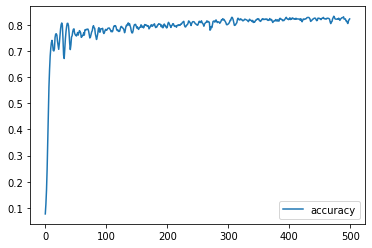

In [10]:
utils.plot_history(history, 'accuracy')

In [11]:

seed_text = "I've got a bad feeling about this"
next_words = 100
  
for _ in range(next_words):
    sequences = tokenizer.texts_to_sequences([seed_text])[0]
    sequences = pad_sequences([sequences], maxlen=max_sequence_len-1, padding='pre')
    predicted = np.argmax(model.predict(sequences)[0])
    output_word = reverse_word_index.get(predicted, "")
    seed_text += " " + output_word

print(seed_text)

I've got a bad feeling about this raking mother dust she take a wife day the laity gone than been granted your true love forever a find him was i required i had had single raising sea rosin the bow of my darling gone are wish me with thee seen delight and this proud summers deceiver me nay rain with all my delight and only with your prime in her voice a right love late thats love gone and our sinking sinking sinking sinking love be handsome and this cold and gone and gone by proud saxon and tory cleared for white horses rode high rocky road


In [12]:
seed_text = "I've got a bad feeling about this"
next_words = 100
# temperature = 0.001
temperature = 1

for _ in range(next_words):
    sequences = tokenizer.texts_to_sequences([seed_text])[0]
    sequences = pad_sequences([sequences], maxlen=max_sequence_len-1, padding='pre')
    predictions = model.predict(sequences)
    rescaled_logits = tf.math.log(predictions) / temperature
    word_id = tf.random.categorical(rescaled_logits, num_samples=1)
    output_word = tokenizer.sequences_to_texts(word_id.numpy())[0]
    seed_text += " " + output_word

print(seed_text)

I've got a bad feeling about this maiden wore the light then ceannt and his chieftains did slaughter never if but hit for our eyes that were made gone there is mary with pride says he hath girded lamenting stood at morn in spring well love the brave we were light is gone and a bunch of footmen and likewise colonel farrell on his pike flashed in my eyes are well you cry an answer that god had sweeter make their enemies round when morn in summer coat last died in great time their days gone like ballyjamesduff judge thought up by eyes their rosin aloft to
